# **<snap style="color:Blue"> Breast Cancer Prediction <snap/>**

# <snap Style="color:white">Author</snap>
* Dr Madeeha Tassadaq 
* [Linkedin](https://www.linkedin.com/in/dr-madeeha-tassadaq-3104aa290/)
* [Github]((https://github.com/MadeehaTassadaq/python_basics))

# <snap Style="color:white">About Dataset</snap>
* [Dataset] (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
*  It is multivariate dataset 

# <snap Style="color:white">Attribute Information</snap>
1) ID number
2) Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:

	1) radius (mean of distances from center to points on the perimeter)
	2) texture (standard deviation of gray-scale values)
	3) perimeter
	4) area
	5) smoothness (local variation in radius lengths)
	6) compactness (perimeter^2 / area - 1.0)
	7) concavity (severity of concave portions of the contour)
	8) concave points (number of concave portions of the contour)
	9) symmetry 
	10) fractal dimension ("coastline approximation" - 1)

# <snap style="color:white">Import libraries</snap>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# <snap Style="color:white">Load Data</snap>

In [23]:
df=pd.read_csv('./project/data.csv')

# <snap Style="color:white">Exploartory Data Analysis</snap>

In [24]:
# show maximum columns
pd.set_option('display.max_columns', None)
# show first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
# remove id and unnamed column
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [26]:
# apply info function to check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [27]:
# check the shape of dataset
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 569 rows and 31 columns


In [28]:
# check for numerical data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
# rename diagnosis column (M=1, B=0)
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

C:\Users\Aaima Amir\AppData\Local\Temp\ipykernel_7768\769733761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='diagnosis',data=df,palette='flare')


Text(0.5, 1.0, 'Count of diagnosis')

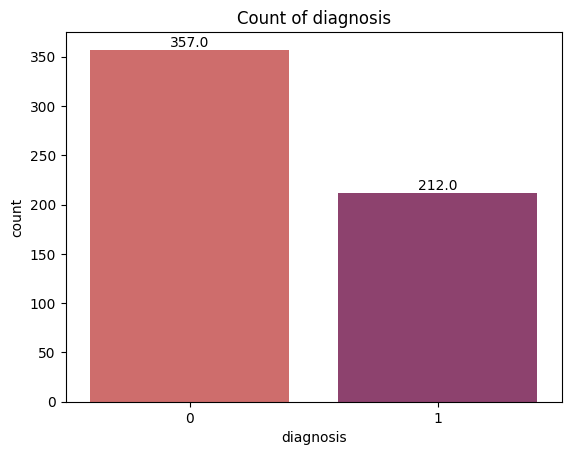

In [30]:
# Diagnosis is our target column
ax=sns.countplot(x='diagnosis',data=df,palette='flare')
# add count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

#set title
ax.set_title('Count of diagnosis')



# <snap style="color:White">Machine Learning</snap>

In [31]:
# split data into features and target
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [32]:
# scale the data through standard scaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [33]:
# Apply PCA
pca=PCA()
pca.fit(X_scaled)

PCA()

In [34]:
# Calculate explained variance ratio
explained_variance_ratio=pca.explained_variance_ratio_
# Find the optimal number of components
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1


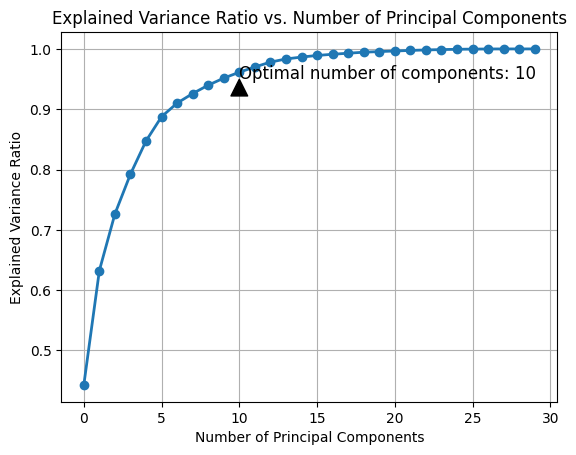

In [35]:
# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
# Annotate the plot with the optimal number of components
plt.annotate(f'Optimal number of components: {optimal_components}', xy=(optimal_components, 0.95), xytext=(optimal_components, 0.95),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.show()


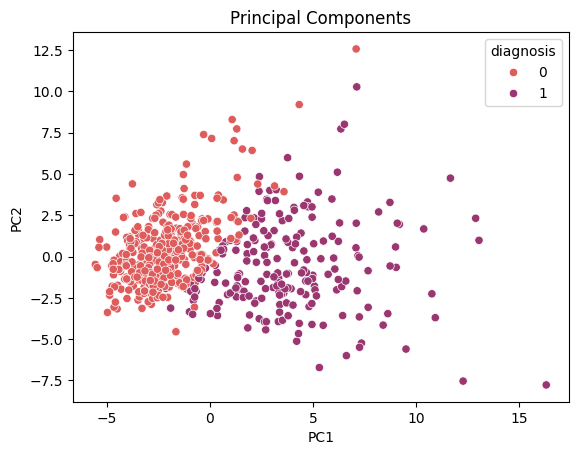

In [36]:
# Apply PCA with the optimal number of components
pca=PCA(n_components=optimal_components)
X_pca=pca.fit_transform(X_scaled)
# Create a DataFrame to hold the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])
# plot the graph
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=y, palette='flare')
plt.title('Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Train the logistic model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)



LogisticRegression()

In [48]:
# Predict the labels for the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2),"%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98 %

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [49]:
# save the model
import pickle

pickle.dump(logistic_model, open('logistic_model.pkl', 'wb'))


In [50]:
# import the model

loaded_model = pickle.load(open('logistic_model.pkl', 'rb'))


##### Logistic Regression is a popular statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to one of two classes. Despite its name, Logistic Regression is actually a classification algorithm rather than a regression algorithm.
##### Our model is best with a predicted accuracy of 98%.
## <snap style='color:Yellow'>I hope u like my work if yes please upvote.</snap>